### 과대적합과 과소적합
<img src="../images/과대_과소적합-1.png" width="500" height="600" />

#### 과대적합(overfitting)
* 훈련데이터에만 잘 맞고 테스트데이터에는 낮은 정답률이 나오는 경우

<img src="../images/과대적합.png" width="" height="" />

#### 과소적합(underfitting)
* 훈련이 제대로 이루어지지 않아 테스트 데이터보다 훈련데이터의 정답률이 낮은 경우
* 훈련, 테스트데이터 모두 정답률이 낮은 경우
* 훈련데이터의 개수가 적을 경우

<img src="../images/과소적합.png" width="" height="" />

---ht="" />

---

### 스케일링
* 수치형 데이터들의 값의 범위가 클 경우 사용한다.(연산 속도 증가)
    - 예를 들어 주식의 가격을 생각했을 경우 100원의 1%와 100000원의 1%를 계산하고자 한다면 같은 1%연산이지만 숫자가 클 경우 연산속도에 영향을 미치게 된다.
* 서로 다른 변수의 값 범위를 일정한 수준으로 맞추고자 하는 경우
* 대표적 스케일링 클래스는 StandardScaler, MinMaxScaler이 있다
* 사용 이유
    - 연산속도를 올릴 수 있다
    - 확률을 높일 수 있다
    - 과대, 과소적합을 조금은 해결할 수 있다
* 참고
    - 이상치가 있을 경우 범위의 차이가 커지게 되므로 이상치는 제거해야 한다
    - RandomForest는 따로 스케일링 할 필요가 없다.(tree계열은 따로 스케일 할 필요가 없다)

#### StandardScaler(label값은 스케일 하지 않는다)
* 사이킷런에서 서포트벡터머신, 선형회귀, 로지스틱 회귀에 적용하는 것이 예측 성능 향상에 중요한 요소가 된다.
* 각 특성의 평균을 0, 편차를 1로 변경하여 정규분포로 만드는 것이다
    - 편차(deviation)는 예측값과 평균의 차이
    
<img src="../images/정규분포.png" width="" height="" />

#### MinMaxScaler(label값은 스케일 하지 않는다)
* 모든 특성이 정확하게 0과 1사이에 위치하도록 데이터를 변경
* k-means, k-nearest neighbor등의 알고리즘에 좋은 성능을 보인다은 성능을 보인다

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
movie = {'daum':[2,4,6,8,10], 'naver':[1,2,3,4,5]}
mv = pd.DataFrame(movie)
mv

,daum,naver
0,2,1
1,4,2
2,6,3
3,8,4
4,10,5


In [3]:
st = StandardScaler()
scaled = st.fit_transform(mv)
mv = pd.DataFrame(data = scaled, columns=['daum', 'naver'])
mv

,daum,naver
0,-1.414214,-1.414214
1,-0.707107,-0.707107
2,0.000000,0.000000
3,0.707107,0.707107
4,1.414214,1.414214


In [4]:
scaled.mean()

0.0

In [5]:
round(scaled.std(), 2)

1.0

In [6]:
from sklearn.preprocessing import MinMaxScaler
mv = pd.DataFrame(movie)
mv

,daum,naver
0,2,1
1,4,2
2,6,3
3,8,4
4,10,5


In [7]:
m = MinMaxScaler()
min_max_mv = m.fit_transform(mv)
pd.DataFrame(min_max_mv, columns=['d', 'n'])

,d,n
0,0.00,0.00
1,0.25,0.25
2,0.50,0.50
3,0.75,0.75
4,1.00,1.00


In [9]:
df = pd.read_csv("../data_set/5.스케일링/bank_train_clean.csv")
df.head()

,age,duration,campaign,pdays,previous,y
0,58,261,1,-1,0,0
1,44,151,1,-1,0,0
2,33,76,1,-1,0,0
3,47,92,1,-1,0,0
4,33,198,1,-1,0,0


In [10]:
df.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'y'], dtype='object')

In [11]:
features = ['age', 'duration', 'campaign', 'pdays', 'previous']
label = 'y'
X, y = df[features], df[label]

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [15]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train);
print("학습 데이터 : ", rfc.score(X_train, y_train))
print("test 데이터 : ", rfc.score(X_test, y_test))

학습 데이터 :  0.9919107656333934
test 데이터 :  0.8781332940135653


In [16]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)
print("학습 데이터 : ", kn.score(X_train, y_train))
print("test 데이터 : ", kn.score(X_test, y_test))
# 학습 데이터와 test 데이터의 차이가 별로 없으므로 좋은 방법!

학습 데이터 :  0.9144942648592284
test 데이터 :  0.8824830433500442


#### 학습 데이터와 테스트 데이터의 차이
* 학습 데이터(Training Data): 모델 학습에 사용되는 데이터
* 테스트 데이터(Test Data): 학습된 모델의 성능을 평가하는 데 사용되는 데이터

#### 학습 데이터와 테스트 데이터의 차이가 적을수록 좋은 이유
* 과적합 방지
    - 학습 데이터와 테스트 데이터의 차이가 크면 모델이 학습 데이터에 과도하게 적응되어 일반화 성능이 떨어질 수 있습니다.
    - 차이가 적을수록 과적합 문제를 방지할 수 있습니다.
* 실제 상황 반영
    - 테스트 데이터는 실제 사용 환경을 반영해야 합니다.
    - 학습 데이터와 테스트 데이터의 차이가 적을수록 모델의 실제 성능을 더 정확하게 평가할 수 있습니다.
* 신뢰성 있는 성능 평가
    - 학습 데이터와 테스트 데이터의 차이가 크면 모델의 성능을 신뢰할 수 없습니다.
    - 차이가 적을수록 모델의 성능을 더 신뢰할 수 있습니다. 신뢰할 수 있습니다. 수 있습니다.

In [17]:
sc = StandardScaler()
sc.fit(X)
X2 = sc.transform(X)
X2

array([[ 1.60696496,  0.0110161 , -0.56935064, -0.41145311, -0.25194037],
       [ 0.28852927, -0.41612696, -0.56935064, -0.41145311, -0.25194037],
       [-0.74738448, -0.70736086, -0.56935064, -0.41145311, -0.25194037],
       ...,
       [ 2.92540065,  3.37379688,  0.72181052,  1.43618859,  1.05047333],
       [ 1.51279098,  0.97014641,  0.39902023, -0.41145311, -0.25194037],
       [-0.37068857,  0.39932797, -0.24656035,  1.4761376 ,  4.52357654]])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3)

In [19]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train);
print("학습 데이터 : ", rfc.score(X_train, y_train))
print("test 데이터 : ", rfc.score(X_test, y_test))

학습 데이터 :  0.9915631813442033
test 데이터 :  0.8800501327042171


In [20]:
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)
print("학습 데이터 : ", kn.score(X_train, y_train))
print("test 데이터 : ", kn.score(X_test, y_test))

학습 데이터 :  0.9126615476980441
test 데이터 :  0.8838838100855205


In [21]:
X2 = m.fit_transform(X)
X2

array([[0.51948052, 0.05307035, 0.        , 0.        , 0.        ],
       [0.33766234, 0.03070354, 0.        , 0.        , 0.        ],
       [0.19480519, 0.01545344, 0.        , 0.        , 0.        ],
       ...,
       [0.7012987 , 0.22915819, 0.06451613, 0.21215596, 0.01090909],
       [0.50649351, 0.10329402, 0.0483871 , 0.        , 0.        ],
       [0.24675325, 0.07340382, 0.01612903, 0.21674312, 0.04      ]])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3)

In [23]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train);
print("학습 데이터 : ", rfc.score(X_train, y_train))
print("test 데이터 : ", rfc.score(X_test, y_test))

kn = KNeighborsClassifier()
kn.fit(X_train, y_train)
print("학습 데이터 : ", kn.score(X_train, y_train))
print("test 데이터 : ", kn.score(X_test, y_test))

학습 데이터 :  0.9923215470660726
test 데이터 :  0.8779121203184901
학습 데이터 :  0.9147786520049294
test 데이터 :  0.8835889118254202


In [24]:
df.corr()

,age,duration,campaign,pdays,previous,y
age,1.000000,-0.004648,0.004760,-0.023758,0.001288,0.025155
duration,-0.004648,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.001203,-0.032855,0.454820,1.000000,0.093236
y,0.025155,0.394521,-0.073172,0.103621,0.093236,1.000000


<Axes: >

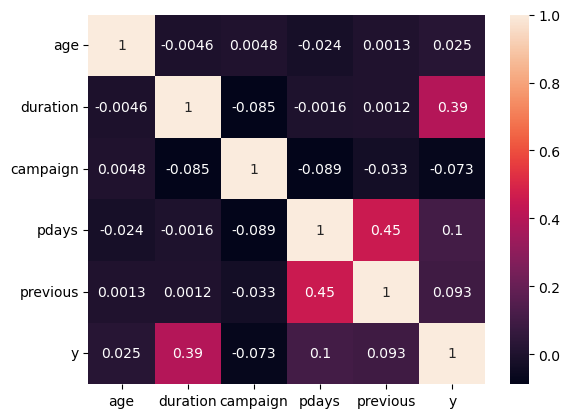

In [26]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

In [28]:
#features = ['age', 'duration', 'campaign', 'pdays', 'previous']
features = ['age', 'duration', 'campaign', 'previous']
label = 'y'
X, y = df[features], df[label]

sc = StandardScaler()
sc.fit(X)
X_scaler = sc.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.3)

In [29]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train);
print("학습 데이터 : ", rfc.score(X_train, y_train))
print("test 데이터 : ", rfc.score(X_test, y_test))

kn = KNeighborsClassifier()
kn.fit(X_train, y_train)
print("학습 데이터 : ", kn.score(X_train, y_train))
print("test 데이터 : ", kn.score(X_test, y_test))

학습 데이터 :  0.9915315827724587
test 데이터 :  0.8650840460041286
학습 데이터 :  0.9094068948083547
test 데이터 :  0.8743733411972869


In [32]:
#features = ['age', 'duration', 'campaign', 'pdays', 'previous']
features = ['age', 'campaign', 'pdays', 'previous']
label = 'y'
X, y = df[features], df[label]

sc = StandardScaler()
sc.fit(X)
X_scaler = sc.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.3)

In [33]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train);
print("학습 데이터 : ", rfc.score(X_train, y_train))
print("test 데이터 : ", rfc.score(X_test, y_test))

kn = KNeighborsClassifier()
kn.fit(X_train, y_train)
print("학습 데이터 : ", kn.score(X_train, y_train))
print("test 데이터 : ", kn.score(X_test, y_test))
# 상관관계가 높은 항목을 제외하고 확인하면 과적합이 줄어드는 것을 확인 할 수 있음 

학습 데이터 :  0.9250481878219105
test 데이터 :  0.8804924800943674
학습 데이터 :  0.8895313931810283
test 데이터 :  0.8731937481568859
